In [1]:
import datetime as dt
import xlwings as xw
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(data=np.random.randn(100, 5),
                  columns=[f"Trial {i}" for i in range(1, 6)])
df

,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5
0,-0.185229,0.018423,-0.531521,0.130956,0.267546
1,-0.222354,0.112434,-1.296678,-0.645815,-1.171866
2,1.226837,-0.094876,-0.619614,-0.064853,-0.195133
3,-0.697025,0.844891,1.599155,0.057270,1.434865
4,-1.796532,-1.896010,0.090565,-0.463594,-1.432450
...,...,...,...,...,...
95,1.591148,0.541188,0.304935,-0.952807,1.062887
96,0.572165,0.360660,-0.238156,-1.151355,0.166245
97,0.253006,-1.356486,0.387211,1.989112,-1.117630
98,-2.398647,-0.467375,-0.085357,-0.782713,-1.930042


In [3]:
xw.view(df)

In [4]:
book = xw.Book()
book.name

'Libro2'

In [7]:
book.sheets

Sheets([<Sheet [Libro2]Hoja1>, <Sheet [Libro2]Hoja3>, <Sheet [Libro2]HojitaMojo>])

In [8]:
sheet1 = book.sheets["Hoja1"]

In [9]:
sheet1.range("A1")

<Range [Libro2]Hoja1!$A$1>

In [10]:
sheet1.range("A1").value="Mojarritas"

In [11]:
sheet1.range("A1").value = [[1, 2],
                            [3, 4]]
sheet1.range("A4").value = "El Mojarras!"

In [14]:
sheet1.range("A1:B2").value

[[1.0, 2.0], [3.0, 4.0]]

In [18]:
a=sheet1.range("A1:B10")[1, 1].value
a

4.0

In [19]:
sheet1["A1"].sheet.book.app

<Excel App 7352>

In [20]:
xw.apps.keys()

[7352]

In [21]:
sheet1["A1"].options(header=False, index=False).value = df

In [22]:
sheet2 = book.sheets["Hoja3"]

In [34]:
sheet1["A15"].value = [[None, "North", "South"],
                       ["Last Year", 2, 5],
                       ["This Year", 3, 6]]

In [36]:
chart = sheet1.charts.add(top=sheet1["A19"].top,
                          left=sheet1["A19"].left)
chart.chart_type = "column_clustered"
chart.set_source_data(sheet1["A15"].expand())

In [37]:
chart = sheet2.charts.add(top=sheet2["A19"].top,
                          left=sheet2["A19"].left)
chart.chart_type = "column_clustered"
chart.set_source_data(sheet2["A1"].expand())

In [38]:
# Read in the chart data as DataFrame
df = sheet1["A15"].expand().options(pd.DataFrame).value
df

,North,South
Last Year,2.0,5.0
This Year,3.0,6.0


In [39]:
# Enable Matplotlib by using the notebook magic command
# and switch to the "seaborn" style
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

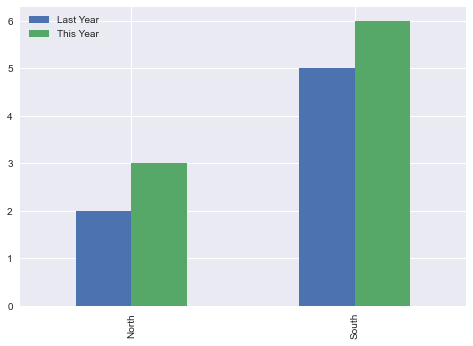

In [44]:
# The pandas plot method returns an "axis" object from 
# where you can get the figure. "T" transposes the
# DataFrame to bring the plot into the desired orientation.
ax = df.T.plot.bar()
fig = ax.get_figure()

In [57]:
# Send the plot to Excel
plot = sheet1.pictures.add(fig, name="SalesPlot",
                           top=sheet1["H19"].top,
                           left=sheet1["H19"].left)
# Let's scale the plot to 70%
plot.width, plot.height = plot.width * 0.7, plot.height * 0.7

In [58]:
# For the sheet scope, prepend the sheet name with
# an exclamation point
sheet1["B10:E11"].name = "Hoja1!matrix2"

In [59]:
# If you want to assign a name to a constant
# or a formula, use the "add" method
book.names.add("EURUSD", "=1.1151")

<Name 'EURUSD': =1.1151>

In [ ]:
peso=sheet1.range("A1").value